# Practical Lab 1: Univariate Linear Regression on California Housing Dataset
**Course Name**: Machine Learning Fundamentals  
**Student**: Parag Shah    
**GitHub Repo**: https://github.com/ParagShah-7/AI-ML-Foundation-of-machine-learning


1. Framing the problem

The goal of this project is to predict median house values in California using simple linear regression based on one independent variable at a time: median income, population, and number of households.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


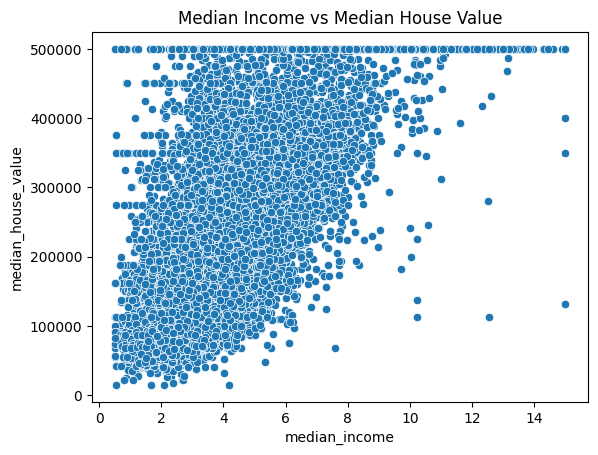

In [9]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median Income vs Median House Value')
plt.show()

In [31]:
X = df[['median_income']]
y = df['median_house_value']

model = LinearRegression()
model.fit(X, y)

intercept_median_income = model.intercept_
slope_median_income = model.coef_[0]

y_pred = model.predict(X)
mse_median_income = mean_squared_error(y, y_pred)
mae_median_income = mean_absolute_error(y, y_pred)
print('mse:', mse_median_income)
print('mae:', mae_median_income)

mse: 7011311502.929527
mae: 62625.9337911434


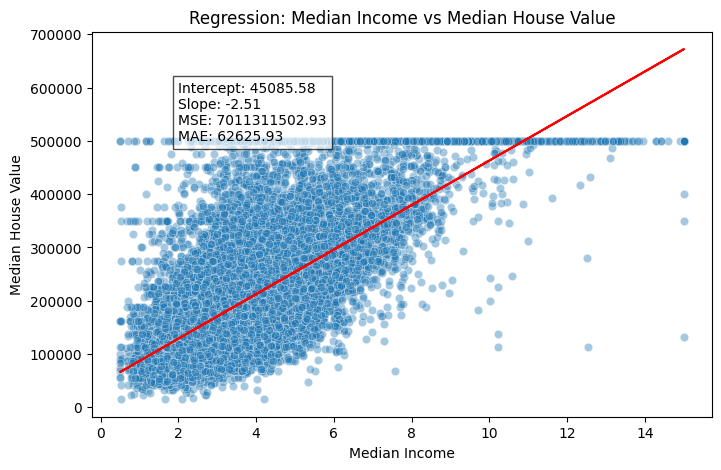

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], alpha=0.4)
plt.plot(df['median_income'], model.predict(df[['median_income']]), color='red')
plt.title("Regression: Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.text(2, 500000, f'Intercept: {intercept_median_income:.2f}\nSlope: {slope:.2f}\nMSE: {mse_median_income:.2f}\nMAE: {mae_median_income:.2f}',
         bbox=dict(facecolor='white', alpha=0.7))
plt.show()

In [34]:
X = df[['households']]
y = df['median_house_value']

model = LinearRegression()
model.fit(X, y)

intercept_household = model.intercept_
slope_household = model.coef_[0]

y_pred = model.predict(X)
mse_households = mean_squared_error(y, y_pred)
mae_households = mean_absolute_error(y, y_pred)
print('mse:', mse_households)
print('mae:', mae_households)

mse: 13257776904.728533
mae: 90802.74324318448


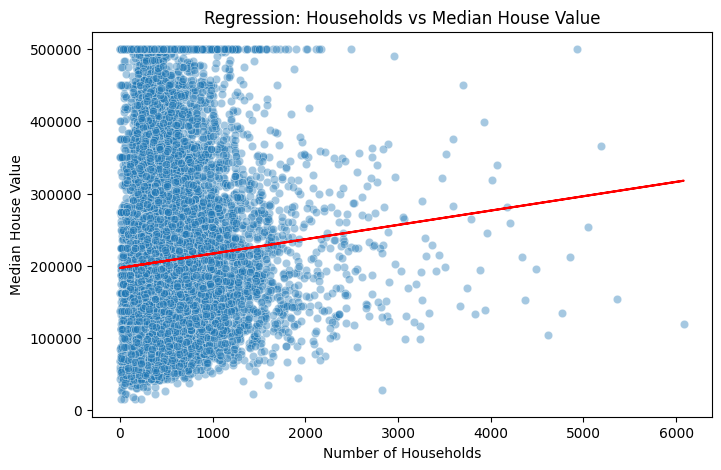

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['households'], y=df['median_house_value'], alpha=0.4)
plt.plot(df['households'], model.predict(df[['households']]), color='red')
plt.title("Regression: Households vs Median House Value")
plt.xlabel("Number of Households")
plt.ylabel("Median House Value")
plt.show()


In [37]:
X = df[['population']]
y = df['median_house_value']

model = LinearRegression()
model.fit(X, y)

intercept_population = model.intercept_
slope_population = model.coef_[0]

y_pred = model.predict(X)
mse_population = mean_squared_error(y, y_pred)
mae_population = mean_absolute_error(y, y_pred)
print('mse:', mse_population)
print('mae:', mae_population)

mse: 13307412412.389355
mae: 91153.82009473183


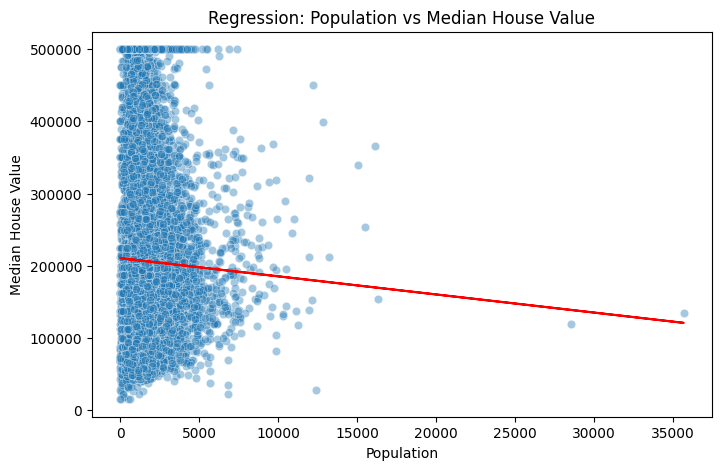

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['population'], y=df['median_house_value'], alpha=0.4)
plt.plot(df['population'], model.predict(df[['population']]), color='red')
plt.title("Regression: Population vs Median House Value")
plt.xlabel("Population")
plt.ylabel("Median House Value")
plt.show()

In [29]:
regression_summary = pd.DataFrame({
    'Independent Variable': ['Median Income', 'Households', 'Population'],
    'Intercept': [intercept_median_income, intercept_household, intercept_population],
    'Slope': [slope_median_income, slope_household , slope_population],
    'MSE': [mse_median_income, mse_households, mse_population],
    'MAE': [mae_median_income, mae_households, mae_population]
})

# Round for clarity
regression_summary = regression_summary.round(2)
regression_summary

,Independent Variable,Intercept,Slope,MSE,MAE
0,Median Income,45085.58,41793.85,7.011312e+09,62625.93
1,Households,196928.58,19.87,1.325778e+10,90802.74
2,Population,210436.26,-2.51,1.330741e+10,91153.82


# Conclusions

Median Income is the strongest predictor of Median House Value, showing the best goodness-of-fit with the lowest error metrics and the clearest linear trend.

Households has a weak correlation and performs moderately.

Population shows a negligible and slightly negative correlation, performing poorly as a predictor.